<a href="https://colab.research.google.com/github/AlchemistDude/Insurance-Claims-ELK-Analysis/blob/main/Data_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries



In [12]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# styling
plt.style.use("ggplot")
rcParams['figure.figsize']=(12,6)

In [4]:
df = pd.read_csv("ppauto_pos.csv")

In [13]:
df.head()

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_B,CumPaidLoss_B,BulkLoss_B,EarnedPremDIR_B,EarnedPremCeded_B,EarnedPremNet_B,Single,PostedReserve97_B
0,43,IDS Property Cas Ins Co,1988,1988,1,607,133,226,957,62,895,0,73044
1,43,IDS Property Cas Ins Co,1988,1989,2,647,333,129,957,62,895,0,73044
2,43,IDS Property Cas Ins Co,1988,1990,3,582,431,38,957,62,895,0,73044
3,43,IDS Property Cas Ins Co,1988,1991,4,598,570,19,957,62,895,0,73044
4,43,IDS Property Cas Ins Co,1988,1992,5,614,615,0,957,62,895,0,73044


In [6]:
df.tail()

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_B,CumPaidLoss_B,BulkLoss_B,EarnedPremDIR_B,EarnedPremCeded_B,EarnedPremNet_B,Single,PostedReserve97_B
14595,43494,American Hallmark Ins Co Of TX,1997,2002,6,5588,5549,0,32271,22646,9625,1,4527
14596,43494,American Hallmark Ins Co Of TX,1997,2003,7,5571,5567,0,32271,22646,9625,1,4527
14597,43494,American Hallmark Ins Co Of TX,1997,2004,8,5577,5577,0,32271,22646,9625,1,4527
14598,43494,American Hallmark Ins Co Of TX,1997,2005,9,5576,5576,0,32271,22646,9625,1,4527
14599,43494,American Hallmark Ins Co Of TX,1997,2006,10,5573,5576,-3,32271,22646,9625,1,4527


Lets see if we have some null values and which type our columns are

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14600 entries, 0 to 14599
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GRCODE             14600 non-null  int64 
 1   GRNAME             14600 non-null  object
 2   AccidentYear       14600 non-null  int64 
 3   DevelopmentYear    14600 non-null  int64 
 4   DevelopmentLag     14600 non-null  int64 
 5   IncurLoss_B        14600 non-null  int64 
 6   CumPaidLoss_B      14600 non-null  int64 
 7   BulkLoss_B         14600 non-null  int64 
 8   EarnedPremDIR_B    14600 non-null  int64 
 9   EarnedPremCeded_B  14600 non-null  int64 
 10  EarnedPremNet_B    14600 non-null  int64 
 11  Single             14600 non-null  int64 
 12  PostedReserve97_B  14600 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.4+ MB


Some basic statistics

In [10]:
df.describe()

,GRCODE,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_B,CumPaidLoss_B,BulkLoss_B,EarnedPremDIR_B,EarnedPremCeded_B,EarnedPremNet_B,Single,PostedReserve97_B
count,14600.000000,14600.00000,14600.000000,14600.00000,1.460000e+04,1.460000e+04,1.460000e+04,1.460000e+04,14600.000000,1.460000e+04,14600.000000,1.460000e+04
mean,18162.013699,1992.50000,1997.000000,5.50000,8.351644e+04,7.207015e+04,5.500457e+03,1.108998e+05,4323.291781,1.065765e+05,0.746575,1.269919e+05
std,12698.810114,2.87238,4.062158,2.87238,7.806727e+05,6.911359e+05,9.914037e+04,1.017305e+06,19912.058503,9.998495e+05,0.434987,1.131769e+06
min,43.000000,1988.00000,1988.000000,1.00000,-8.000000e+00,-5.900000e+01,-7.500000e+02,-1.000000e+01,-2808.000000,-5.100000e+01,0.000000,0.000000e+00
25%,9466.000000,1990.00000,1994.000000,3.00000,1.420000e+02,1.090000e+02,0.000000e+00,3.307500e+02,0.000000,1.952500e+02,0.000000,7.150000e+02
50%,14954.500000,1992.50000,1997.000000,5.50000,1.940000e+03,1.650500e+03,0.000000e+00,4.113000e+03,443.000000,2.889500e+03,1.000000,3.443500e+03
75%,27766.000000,1995.00000,2000.000000,8.00000,8.767250e+03,7.314250e+03,5.200000e+01,1.429075e+04,1914.500000,1.114725e+04,1.000000,1.242600e+04
max,43494.000000,1997.00000,2006.000000,10.00000,1.169300e+07,1.051211e+07,3.830524e+06,1.506571e+07,313122.000000,1.492338e+07,1.000000,1.359348e+07


Lets see if we have duplicated values


In [15]:
df.duplicated().sum()

0

# Univariate Analysis

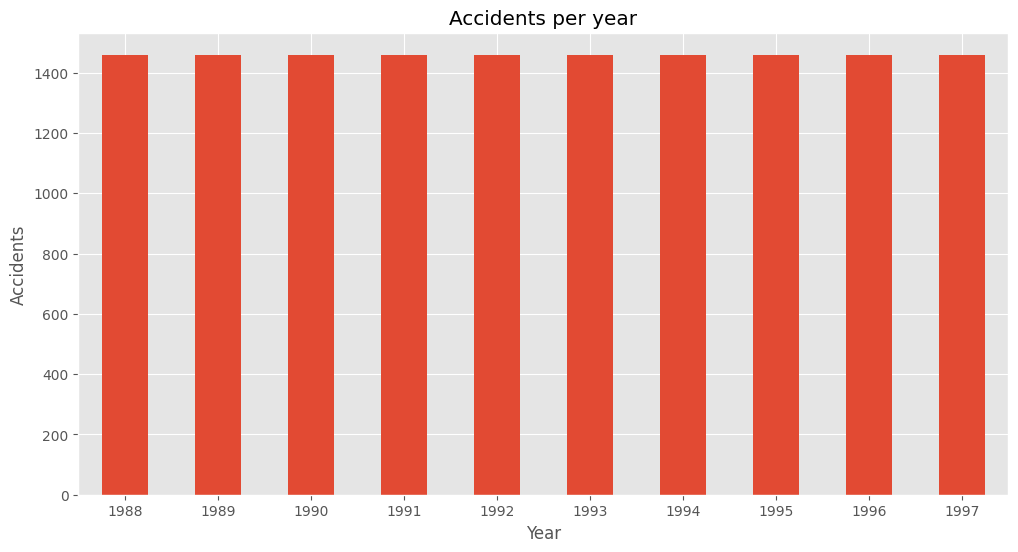

In [19]:
df.AccidentYear.value_counts().plot(kind="bar")
plt.title("Accidents per year")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.ylabel("Accidents")
plt.show()

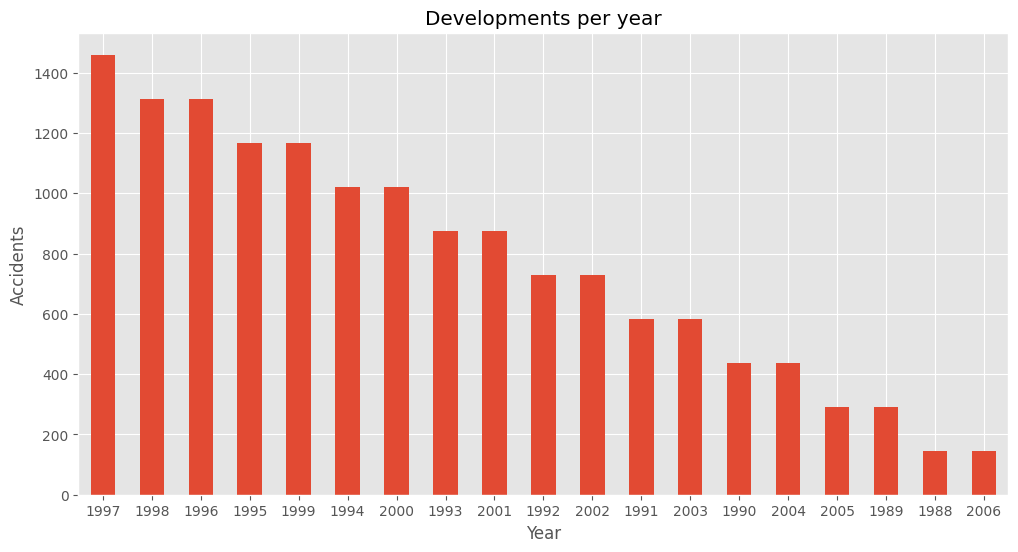

In [20]:
df.DevelopmentYear.value_counts().plot(kind="bar")
plt.title("Developments per year")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.ylabel("Accidents")
plt.show()

<Axes: >

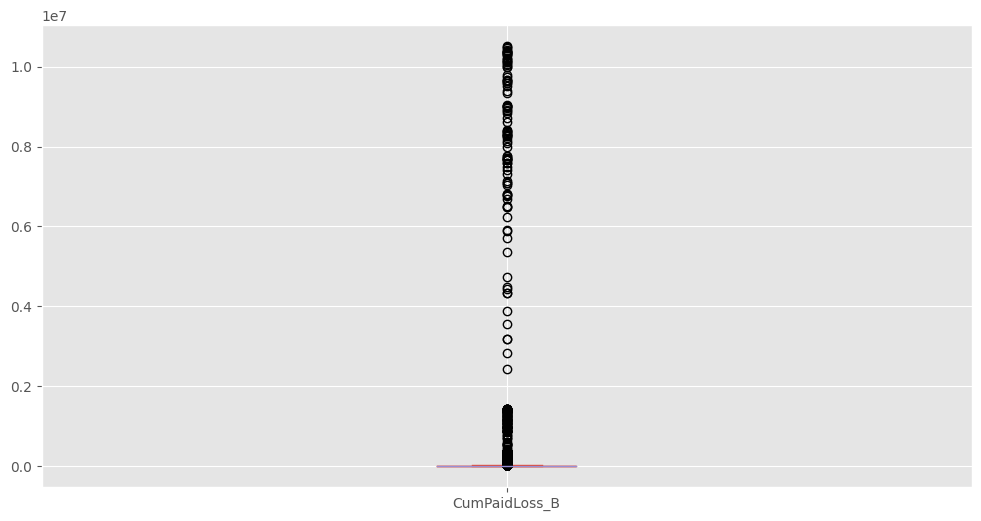

In [23]:
df['CumPaidLoss_B'].plot(kind="box")